I'm a little confused by lognormal distributions.

Let's say I have a parameter that is distributed as:

\begin{equation}
V \sim \mathcal{N}(5, 2) \, ,
\end{equation}

how would I represent this in a lognormal distribution so it can't fall below zero? A lognormal distribution is defined as:

\begin{equation}
\ln(V) \sim \ln(\mathcal{N}(5, 2)) \, ,
\end{equation}

> In probability theory, a lognormal distribution is a ... probability distribution o a random variable who's *logarithm is normally distributed*.

> Thus if $X$ is log-normally distributed, then $Y - \ln(X)$ is normally distributed.

In [8]:
import numpy as np
import seaborn as sns
import pylab as plt

In [14]:
npts = 5000
mu = 10
sig = 2
v = np.random.normal(mu, sig, npts)

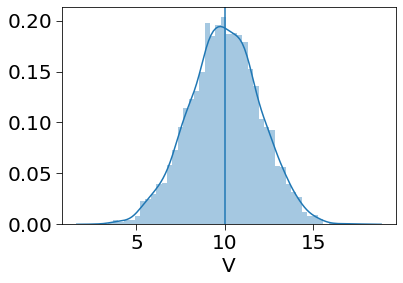

In [17]:
sns.distplot(v)
plt.xlabel('V')
plt.axvline(mu)

This extends below 0, which we don't want it to do. What does the logarithm look like?

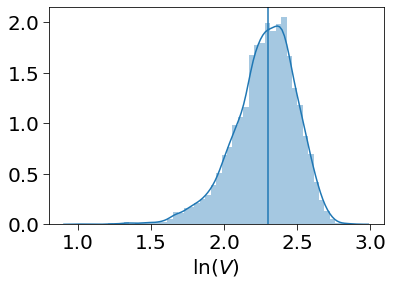

In [18]:
sns.distplot(np.log(v))
plt.xlabel(r'$\ln(V)$')
plt.axvline(np.log(mu))
plt.show()

If we wanted a lognormal distribution to recapture this same distribution, should we be using

\begin{equation}
\ln(V) \sim \log\mathcal{N}(\ln(10), \ln(2)) \, ?
\end{equation}

In [39]:
lnv = np.random.lognormal(np.log(mu), np.log(2), npts)

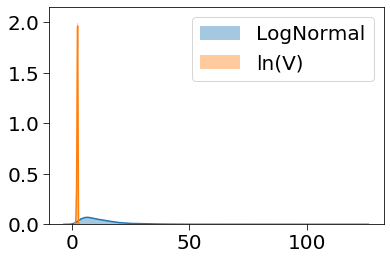

In [40]:
sns.distplot(lnv, label='LogNormal')
sns.distplot(np.log(v), label='ln(V)')
plt.legend()

Okay, these don't line up...

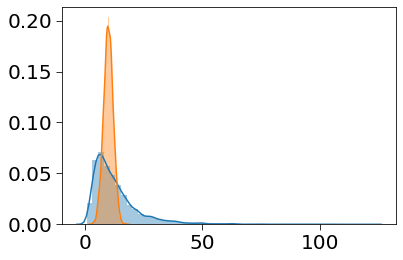

In [41]:
sns.distplot(lnv, label='LogNormal')
sns.distplot(v, label='V')

I guess this only truly works if the logarithm of V is normally distributed, but in this case we want it to be the other way round?

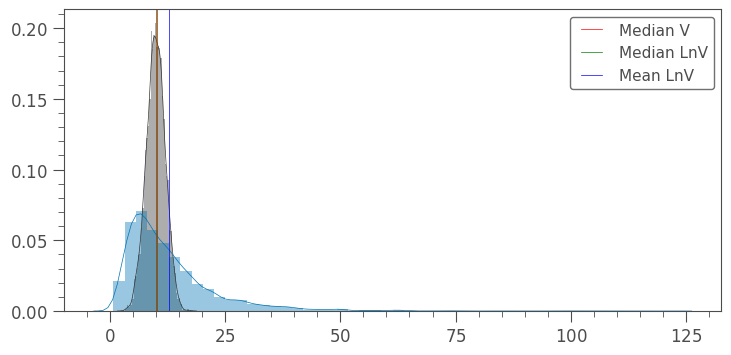

In [53]:
import mystyle as ms
with plt.style.context(ms.ms):
    sns.distplot(v)
    sns.distplot(lnv)
    plt.axvline(np.median(v), c='r', label='Median V')
    plt.axvline(np.median(lnv), c='g', label='Median LnV')
    plt.axvline(np.mean(lnv), c='b', label='Mean LnV')
    plt.legend()

In both cases the median values intersect at $\mu$, but with $V$ distributed lognormally, it can not fall below zero.

Let's try a more realistic example.

In [70]:
npts = 10000
mu = 0.7
sigma = .1
v = np.random.normal(mu, sigma, npts)
lnv = np.random.lognormal(np.log(mu), sigma, npts)

Median of Normal: 0.6987739484139751
Median of LogNormal: 0.6997728744574782


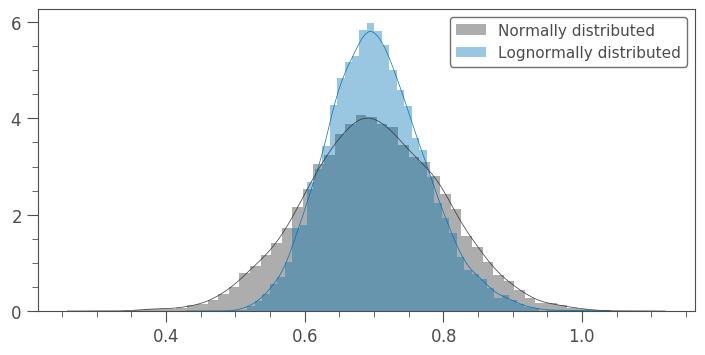

In [71]:
with plt.style.context(ms.ms):
    sns.distplot(v, label='Normally distributed')
    sns.distplot(lnv, label='Lognormally distributed')
    plt.legend()
print(f'Median of Normal: {np.median(v)}')
print(f'Median of LogNormal: {np.median(lnv)}')

This example indicates that $\sigma$ should remain as is.

The equations seem to agree. Let's check our previous example:

In [80]:
npts = 10000
mu = 10.
sigma = 2.
v = np.random.normal(mu, sigma, npts)
lnv = np.random.lognormal(np.log(mu), sigma, npts)

Median of Normal: 9.998265408040904
Median of LogNormal: 9.910294199282742


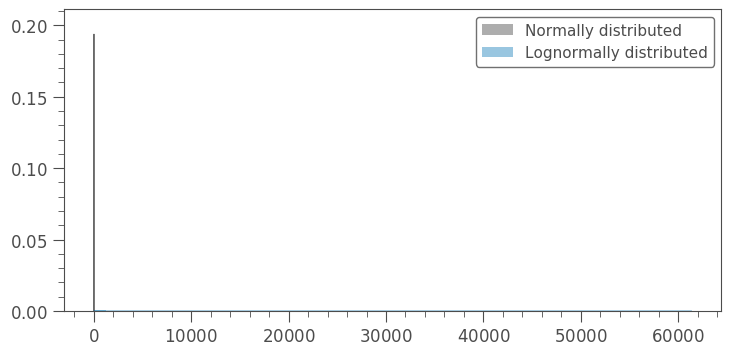

In [81]:
with plt.style.context(ms.ms):
    sns.distplot(v, label='Normally distributed')
    sns.distplot(lnv, label='Lognormally distributed')
    plt.legend()
print(f'Median of Normal: {np.median(v)}')
print(f'Median of LogNormal: {np.median(lnv)}')

Yep, the plots are unsightly but otherwise okay.

Conclusions: our parameters that can't go below zero should be distributed as 

\begin{equation}
V \sim \rm{LogNormal}(\ln(\mu), \sigma)
\end{equation}